# Task
Load the `test.csv` dataset into a pandas DataFrame and display its first few rows.

## Load Test Data


In [ ]:
import pandas as pd

df_test = pd.read_csv('/content/test.csv')
print("Test dataset loaded successfully.")

Test dataset loaded successfully.


## Initial Data Overview



In [ ]:
df_test.info()
print("\n")
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25889 entries, 0 to 25888
Columns: 124 entries, id to mass_item_sale
dtypes: float64(122), object(2)
memory usage: 24.5+ MB




,id,player_id,login_count_1,login_count_2,login_count_3,login_count_4,login_lat_1,login_lon_1,login_lat_2,login_lon_2,...,guild_changes_1,guild_changes_2,guild_changes_3,guild_changes_4,account_age_days,behavior_stability,password_changed,vpn_usage,suspicious_login_time,mass_item_sale
0,ANS00001,P011753,31.222232,41.790417,28.048736,NaN,-17.074035,127.285635,-17.554811,126.865553,...,1.0,2.0,2.0,1.0,580.020715,0.830282,0.0,1.0,0.0,0.0
1,ANS00002,P010021,61.358999,49.209284,NaN,NaN,48.430879,25.555743,48.708993,26.733951,...,0.0,-1.0,-1.0,1.0,1306.627890,0.700770,0.0,NaN,0.0,0.0
2,ANS00003,P006725,24.763478,37.723228,26.879628,32.503285,8.252684,40.788695,8.346856,40.688039,...,0.0,1.0,-1.0,0.0,835.638378,0.797991,0.0,0.0,0.0,0.0
3,ANS00004,P018170,82.100747,74.862388,73.520927,83.495309,-28.728293,178.990465,-29.104994,178.810800,...,2.0,2.0,1.0,3.0,NaN,0.736845,0.0,NaN,0.0,0.0
4,ANS00005,P003027,50.901216,70.636572,55.606357,68.179388,-46.833704,167.886402,-47.372141,166.767058,...,NaN,-1.0,0.0,0.0,379.053416,0.818901,NaN,0.0,0.0,0.0


## Descriptive Statistics


In [ ]:
print(df_test.describe())

       login_count_1  login_count_2  login_count_3  login_count_4  \
count   24664.000000   24620.000000   24661.000000   24569.000000   
mean       59.168038      59.252681      59.141820      59.108049   
std        24.382716      25.647370      24.982790      23.822515   
min         8.681218       6.771318       8.168783       7.802166   
25%        38.379785      38.114418      38.168395      38.606611   
50%        58.207847      57.316760      57.721300      58.437790   
75%        78.067660      77.630937      77.486436      78.523744   
max       118.481216     128.474795     123.552919     113.751919   

        login_lat_1   login_lon_1   login_lat_2   login_lon_2   login_lat_3  \
count  24619.000000  24567.000000  24649.000000  24644.000000  24605.000000   
mean       0.011657      0.262186      0.012217      0.071086      0.189822   
std       34.528865    103.690887     34.503624    103.740635     34.624025   
min      -61.082098   -180.751184    -61.060262   -181.234840 

## Missing Value Analysis

In [ ]:
missing_values_count = df_test.isnull().sum()
missing_values_percent = 100 * df_test.isnull().sum() / len(df_test)

missing_values_df = pd.DataFrame({
    'Missing Count': missing_values_count,
    'Missing Percent': missing_values_percent
}).sort_values(by='Missing Count', ascending=False)

print("Missing values count and percentage per column (sorted descending by count):\n")
print(missing_values_df[missing_values_df['Missing Count'] > 0])

Missing values count and percentage per column (sorted descending by count):

                         Missing Count  Missing Percent
ip_hash_entropy_1                 1363         5.264784
kda_mean_1                        1334         5.152768
accuracy_mean_2                   1333         5.148905
kda_std_2                         1332         5.145042
login_lon_1                       1322         5.106416
...                                ...              ...
session_duration_mean_4           1192         4.604272
performance_stability_1           1192         4.604272
ip_hash_entropy_3                 1187         4.584959
vpn_usage                         1184         4.573371
kda_mean_4                        1164         4.496118

[122 rows x 2 columns]


## Feature Type Identification


In [ ]:
numerical_features = df_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_test.select_dtypes(include=['object']).columns.tolist()

print(f"Number of numerical features: {len(numerical_features)}")
print(f"Example numerical features: {numerical_features[:5]}\n")

print(f"Number of categorical features: {len(categorical_features)}")
print(f"Example categorical features: {categorical_features[:5]}")

Number of numerical features: 122
Example numerical features: ['login_count_1', 'login_count_2', 'login_count_3', 'login_count_4', 'login_lat_1']

Number of categorical features: 2
Example categorical features: ['id', 'player_id']


## Visualize Data Distributions



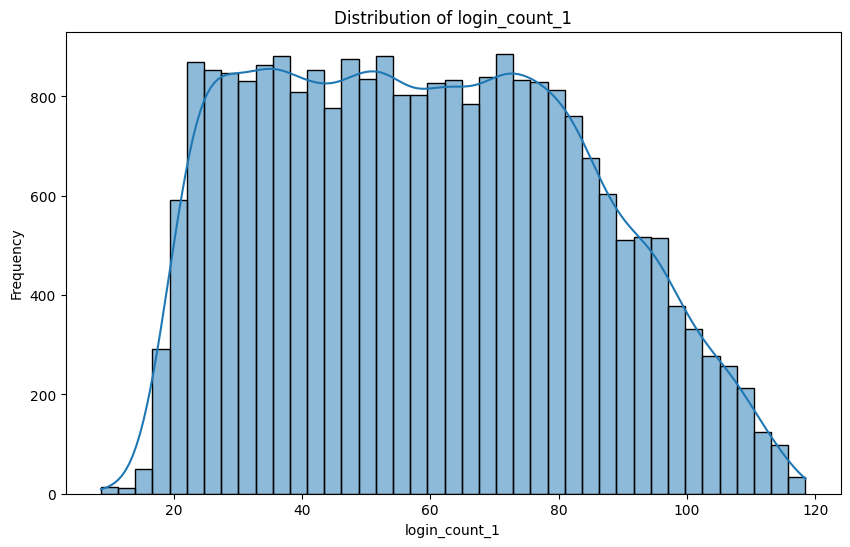

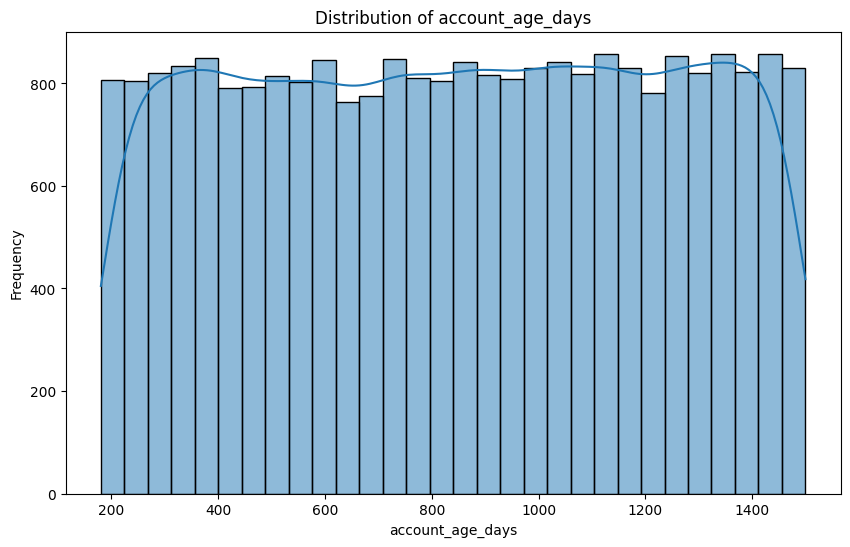

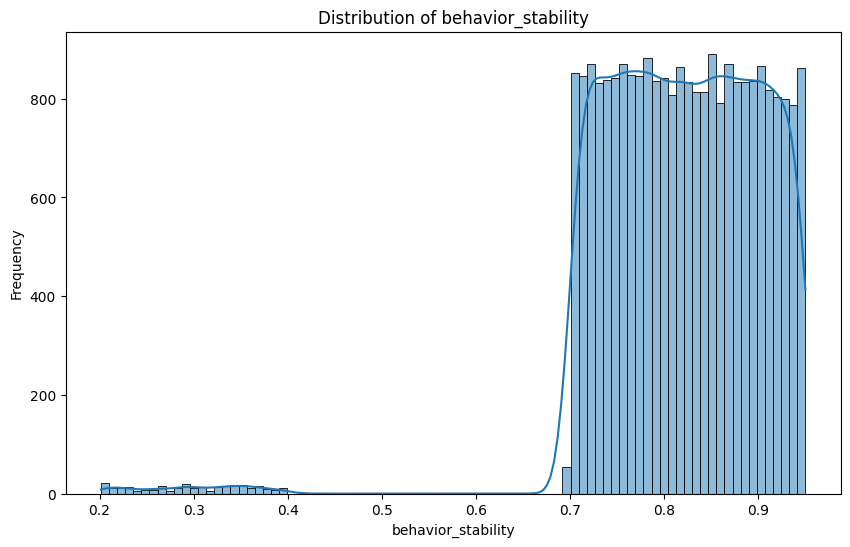


Number of unique values in 'id': 25889
Number of unique values in 'player_id': 25889


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Numerical Features Histograms ---

# Select a few representative numerical features for visualization
selected_numerical_features = ['login_count_1', 'account_age_days', 'behavior_stability']

for feature in selected_numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_test, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# --- Categorical Features Cardinality ---

print(f"\nNumber of unique values in 'id': {df_test['id'].nunique()}")
print(f"Number of unique values in 'player_id': {df_test['player_id'].nunique()}")

## Identify Numerical Features for Processing



In [ ]:
numeric_cols = [col for col in numerical_features if col not in ['id', 'player_id']]

print(f"Identified {len(numeric_cols)} numerical columns (excluding 'id' and 'player_id').")
print("Example numerical columns:")
print(numeric_cols[:5])

Identified 122 numerical columns (excluding 'id' and 'player_id').
Example numerical columns:
['login_count_1', 'login_count_2', 'login_count_3', 'login_count_4', 'login_lat_1']


## Impute Missing Values and Scale Features



In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Create an instance of SimpleImputer with 'median' strategy
median_imputer = SimpleImputer(strategy='median')

# Apply the median imputer to the numerical columns
df_test_imputed = pd.DataFrame(median_imputer.fit_transform(df_test[numeric_cols]), columns=numeric_cols)

# Create an instance of StandardScaler
scaler = StandardScaler()

# Apply the standard scaler to the imputed numerical data
X = scaler.fit_transform(df_test_imputed)

print("Missing values imputed with median and features scaled successfully.")
print(f"Shape of the processed numerical matrix X: {X.shape}")
print("First 5 rows of the processed numerical matrix X:")
print(X[:5])

Missing values imputed with median and features scaled successfully.
Shape of the processed numerical matrix X: (25889, 122)
First 5 rows of the processed numerical matrix X:
[[-1.17232132 -0.6943094  -1.27235559 -0.02740885 -0.50735023  1.25726782
  -0.52181765  1.25253953 -0.55897525  1.26396445 -0.54422251  1.25850273
   2.34787902  1.37932359  1.48613758  0.77210012  1.06198151  1.64160875
  -0.50296124 -0.02015859  0.2834496   0.02045548 -1.66938771 -1.14361294
  -1.36234665 -1.69253048 -1.46254731 -1.36161848 -0.03061099  0.96614833
   1.67041461  1.14718637  0.1233206   1.39677644  0.84587687  0.82156601
  -1.2266835  -1.18127095 -1.17605442 -1.09117967 -0.00896609 -0.26419394
  -0.28280126 -0.25852644 -0.06165935 -0.68030648 -0.30924343 -0.48364543
  -0.44087763 -0.49834328 -0.66687219 -0.57199981  1.17483244  0.273333
   0.10889858  0.99290271  0.20164083  0.33432472  0.94098761  0.51096076
  -0.90975083 -0.91733942 -0.77000996 -1.07782507  1.18692838  1.40612681
   2.16869327

## Verify Processed Numerical Matrix




In [ ]:
print(f"Shape of the processed numerical matrix X: {X.shape}")
print("\nFirst 5 rows of the processed numerical matrix X:")
print(X[:5])
print("\nProcessed numerical columns (numeric_cols):")
print(numeric_cols)

Shape of the processed numerical matrix X: (25889, 122)

First 5 rows of the processed numerical matrix X:
[[-1.17232132 -0.6943094  -1.27235559 -0.02740885 -0.50735023  1.25726782
  -0.52181765  1.25253953 -0.55897525  1.26396445 -0.54422251  1.25850273
   2.34787902  1.37932359  1.48613758  0.77210012  1.06198151  1.64160875
  -0.50296124 -0.02015859  0.2834496   0.02045548 -1.66938771 -1.14361294
  -1.36234665 -1.69253048 -1.46254731 -1.36161848 -0.03061099  0.96614833
   1.67041461  1.14718637  0.1233206   1.39677644  0.84587687  0.82156601
  -1.2266835  -1.18127095 -1.17605442 -1.09117967 -0.00896609 -0.26419394
  -0.28280126 -0.25852644 -0.06165935 -0.68030648 -0.30924343 -0.48364543
  -0.44087763 -0.49834328 -0.66687219 -0.57199981  1.17483244  0.273333
   0.10889858  0.99290271  0.20164083  0.33432472  0.94098761  0.51096076
  -0.90975083 -0.91733942 -0.77000996 -1.07782507  1.18692838  1.40612681
   2.16869327  1.66837078 -0.95987453 -0.83717107 -0.8786783  -0.84321801
  -0.77

## Train Isolation Forest Model



In [ ]:
from sklearn.ensemble import IsolationForest

# Instantiate Isolation Forest model
# Set contamination='auto' for automatic outlier proportion detection
# Set random_state for reproducibility
isolation_forest_model = IsolationForest(random_state=42, contamination='auto')

# Fit the model to the preprocessed numerical data
isolation_forest_model.fit(X)

print("Isolation Forest model instantiated and trained successfully.")

Isolation Forest model instantiated and trained successfully.


## Predict Anomaly Scores



In [ ]:
anomaly_scores = isolation_forest_model.decision_function(X)

print("Anomaly scores predicted successfully.")
print("First 10 anomaly scores:")
print(anomaly_scores[:10])

Anomaly scores predicted successfully.
First 10 anomaly scores:
[ 0.01009827  0.04395489  0.04959903  0.03993681  0.03246819 -0.00027634
 -0.00111517  0.02358374  0.0143182   0.03342278]


## Analyze Anomaly Scores

### Subtask:
Display the distribution of the predicted anomaly scores and identify potential outliers based on these scores.


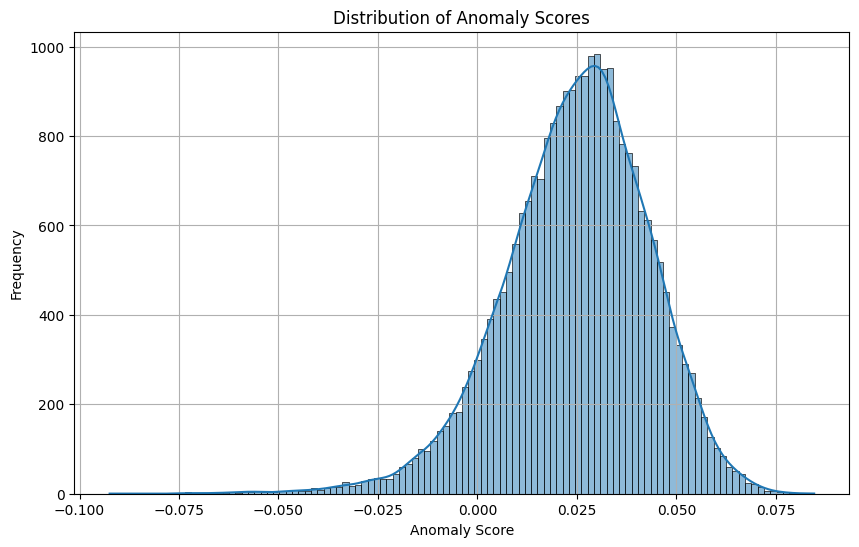


Descriptive Statistics of Anomaly Scores:
count    25889.000000
mean         0.024824
std          0.018236
min         -0.092443
25%          0.013795
50%          0.026068
75%          0.037238
max          0.084639
dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a pandas Series for easy descriptive statistics calculation
anomaly_scores_series = pd.Series(anomaly_scores)

# Plotting the distribution of anomaly scores
plt.figure(figsize=(10, 6))
sns.histplot(anomaly_scores_series, kde=True)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print descriptive statistics of anomaly scores
print("\nDescriptive Statistics of Anomaly Scores:")
print(anomaly_scores_series.describe())

In [ ]:
threshold = anomaly_scores_series.quantile(0.05)

anomalies = anomaly_scores_series[anomaly_scores_series < threshold]

print(f"Anomaly score threshold (5th percentile): {threshold:.4f}")
print(f"Number of potential anomalies detected: {len(anomalies)}")

Anomaly score threshold (5th percentile): -0.0063
Number of potential anomalies detected: 1295


## Generate Tail Histogram of Anomaly Scores




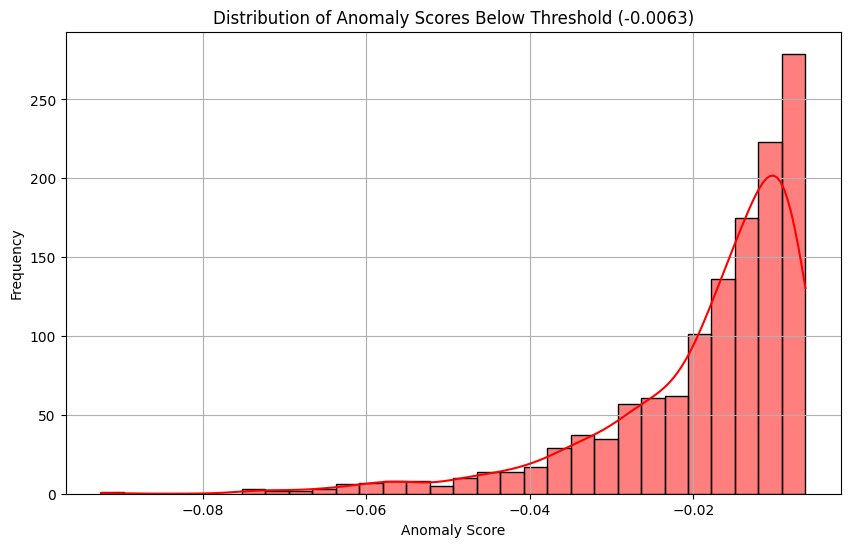


Number of anomaly scores below the threshold: 1295

Descriptive Statistics of Anomaly Scores Below Threshold:
count    1295.000000
mean       -0.018424
std         0.012368
min        -0.092443
25%        -0.023280
50%        -0.014535
75%        -0.009586
max        -0.006272
dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter anomaly scores below the threshold
tail_anomalies = anomaly_scores_series[anomaly_scores_series < threshold]

# Create a histogram for the tail anomalies
plt.figure(figsize=(10, 6))
sns.histplot(tail_anomalies, kde=True, color='red', bins=30)
plt.title(f'Distribution of Anomaly Scores Below Threshold ({threshold:.4f})')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print the number of anomaly scores below the threshold
print(f"\nNumber of anomaly scores below the threshold: {len(tail_anomalies)}")

# Print descriptive statistics of the tail anomalies
print("\nDescriptive Statistics of Anomaly Scores Below Threshold:")
print(tail_anomalies.describe())

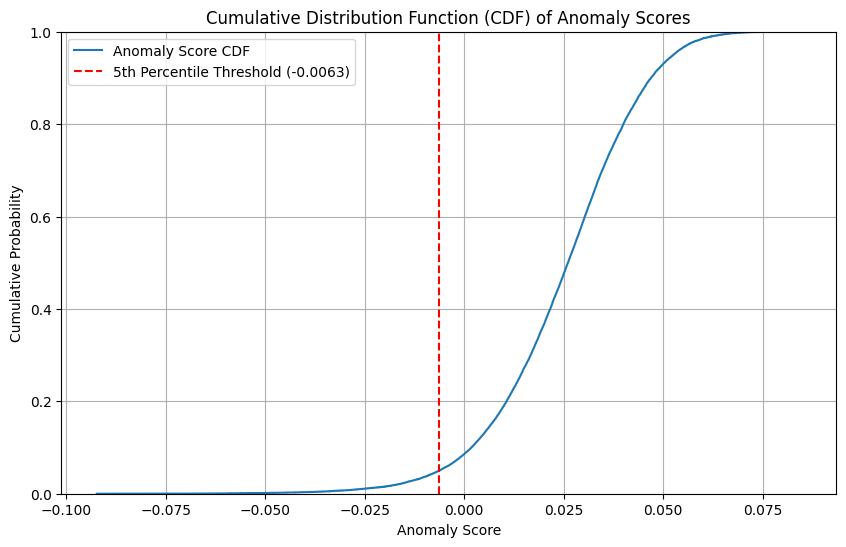

In [ ]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(anomaly_scores_series, label='Anomaly Score CDF')
plt.axvline(x=threshold, color='red', linestyle='--', label=f'5th Percentile Threshold ({threshold:.4f})')
plt.title('Cumulative Distribution Function (CDF) of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.legend()
plt.show()

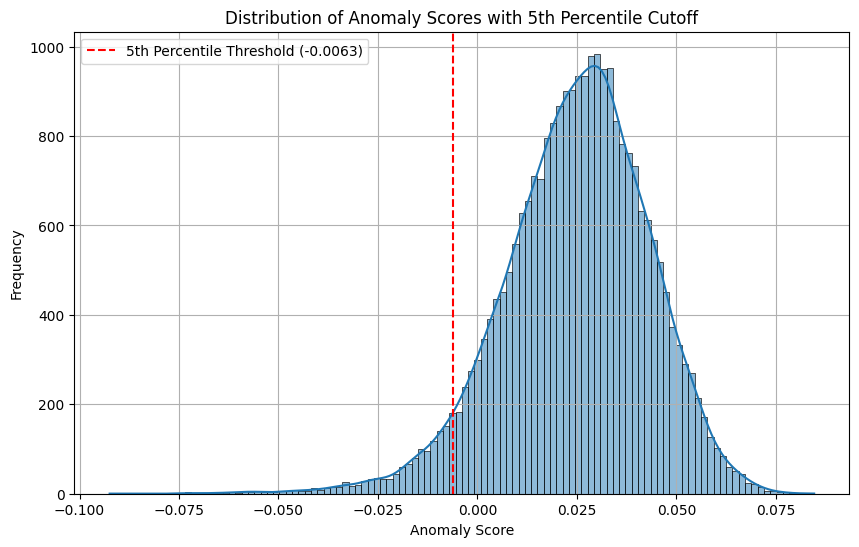

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(anomaly_scores_series, kde=True)
plt.axvline(x=threshold, color='red', linestyle='--', label=f'5th Percentile Threshold ({threshold:.4f})')
plt.title('Distribution of Anomaly Scores with 5th Percentile Cutoff')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()


## Apply PCA for Dimensionality Reduction


In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Create a PCA instance with 2 components
pca = PCA(n_components=2)

# Fit and transform the processed numerical matrix X
X_pca = pca.fit_transform(X)

# Convert the PCA-transformed data into a pandas DataFrame
X_pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

print("PCA applied successfully.")
print("Shape of X_pca_df:", X_pca_df.shape)
print("First 5 rows of X_pca_df:")
print(X_pca_df.head())

PCA applied successfully.
Shape of X_pca_df: (25889, 2)
First 5 rows of X_pca_df:
        PC1       PC2
0  0.699654  1.757880
1  2.188246 -1.980482
2 -0.866189  0.038660
3 -2.540696  2.924444
4 -1.130975  2.240754


## Visualize PCA Components


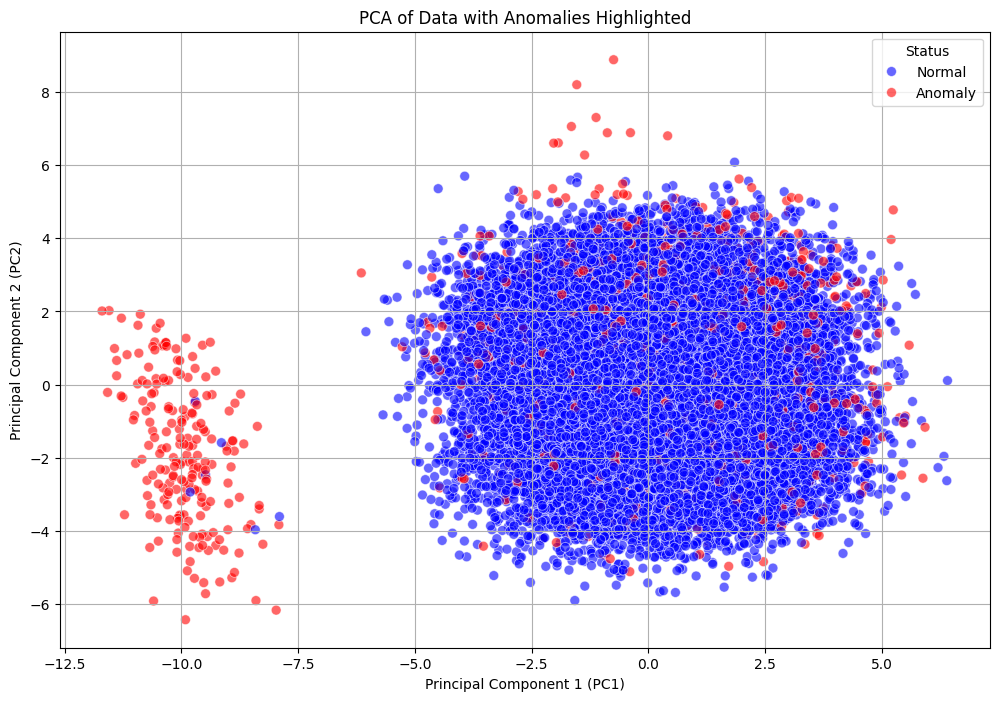

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create 'is_anomaly' column in X_pca_df
X_pca_df['is_anomaly'] = anomaly_scores_series < threshold

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=X_pca_df,
    x='PC1',
    y='PC2',
    hue='is_anomaly',
    palette={True: 'red', False: 'blue'},
    markers={True: 'X', False: 'o'},
    s=50, # size of markers
    alpha=0.6 # transparency
)

# Add title and labels
plt.title('PCA of Data with Anomalies Highlighted')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')

# Customize legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[0:], labels=['Normal', 'Anomaly'], title='Status')

plt.grid(True)
plt.show()

## Define Multiple Anomaly Thresholds




In [ ]:
percentile_values = [27, 30, 33]
anomaly_thresholds = {}

for p in percentile_values:
    threshold_value = anomaly_scores_series.quantile(p / 100.0)
    anomaly_thresholds[p] = threshold_value

print("Defined anomaly thresholds at different percentiles:")
for p, val in anomaly_thresholds.items():
    print(f"  {p}th Percentile: {val:.4f}")

Defined anomaly thresholds at different percentiles:
  27th Percentile: 0.0149
  30th Percentile: 0.0167
  33th Percentile: 0.0182


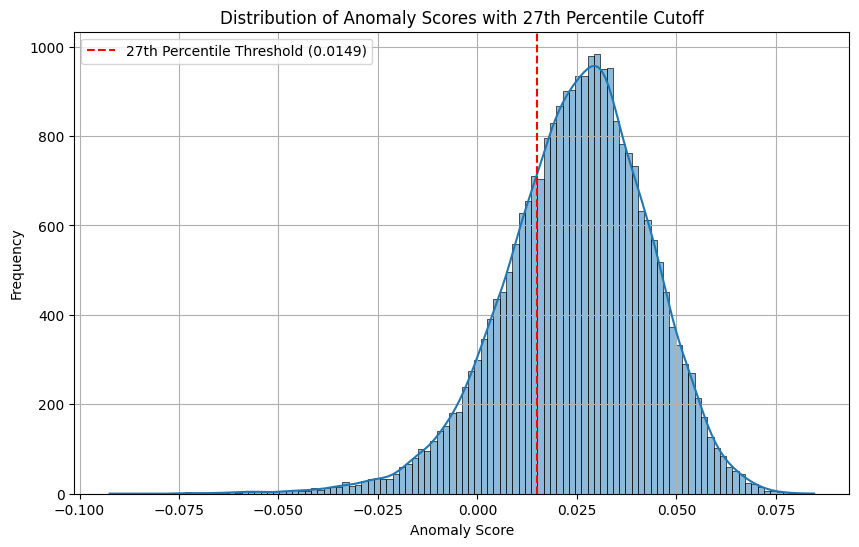

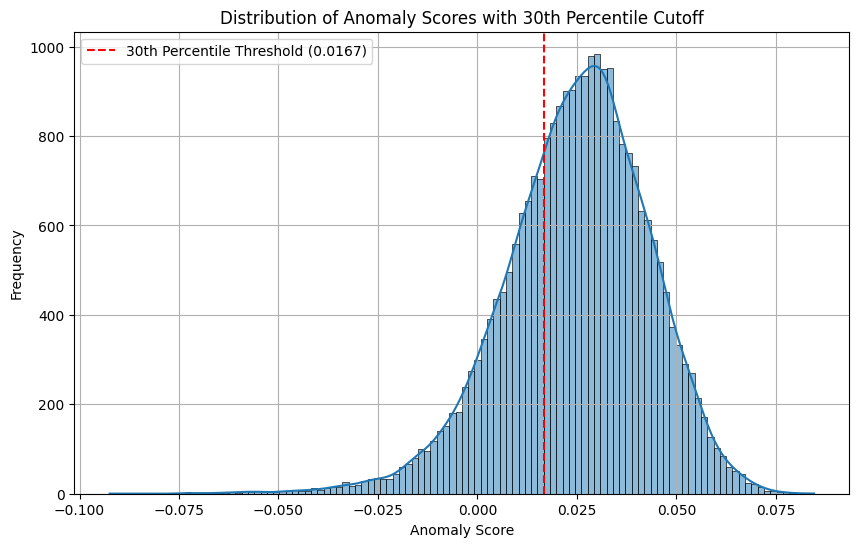

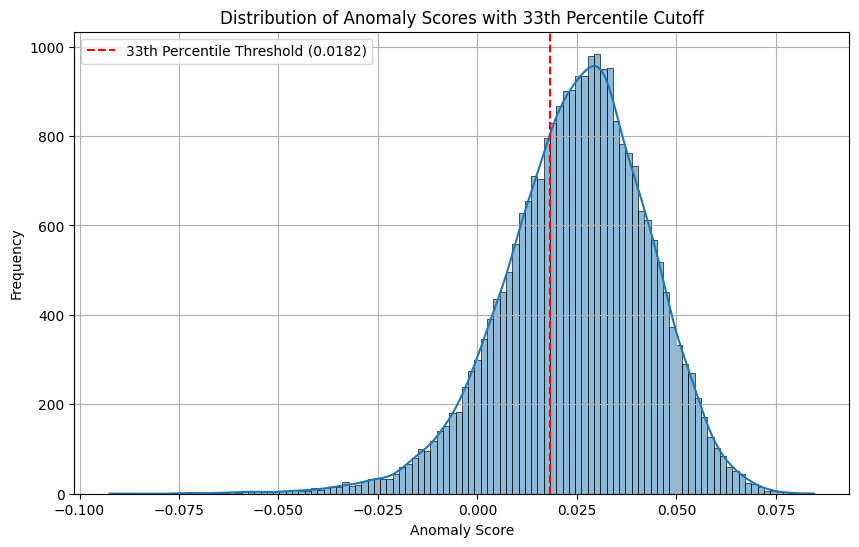

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for p, threshold_val in anomaly_thresholds.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(anomaly_scores_series, kde=True)
    plt.axvline(x=threshold_val, color='red', linestyle='--', label=f'{p}th Percentile Threshold ({threshold_val:.4f})')
    plt.title(f'Distribution of Anomaly Scores with {p}th Percentile Cutoff')
    plt.xlabel('Anomaly Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.legend()
    plt.show()

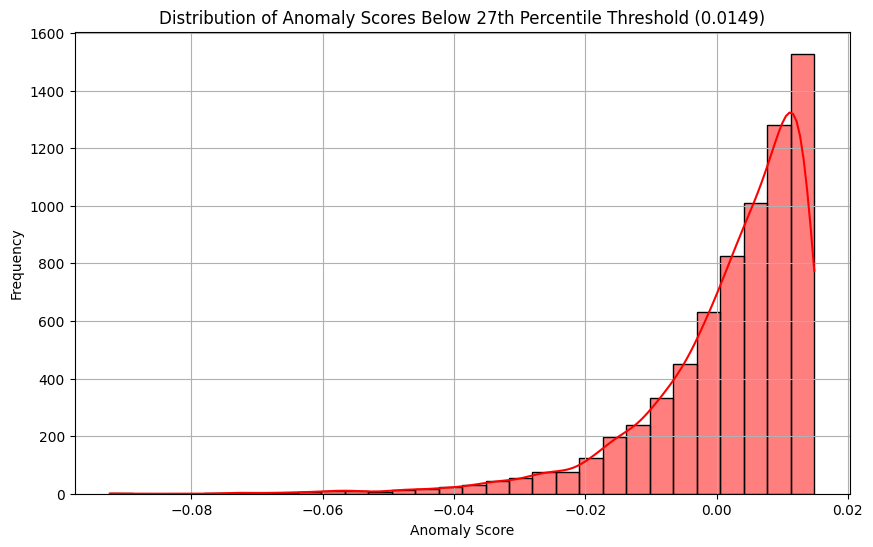


Number of anomaly scores below the 27th percentile threshold: 6990
Descriptive Statistics of Anomaly Scores Below Threshold:
count    6990.000000
mean        0.002008
std         0.012256
min        -0.092443
25%        -0.002791
50%         0.005359
75%         0.010747
max         0.014899
dtype: float64


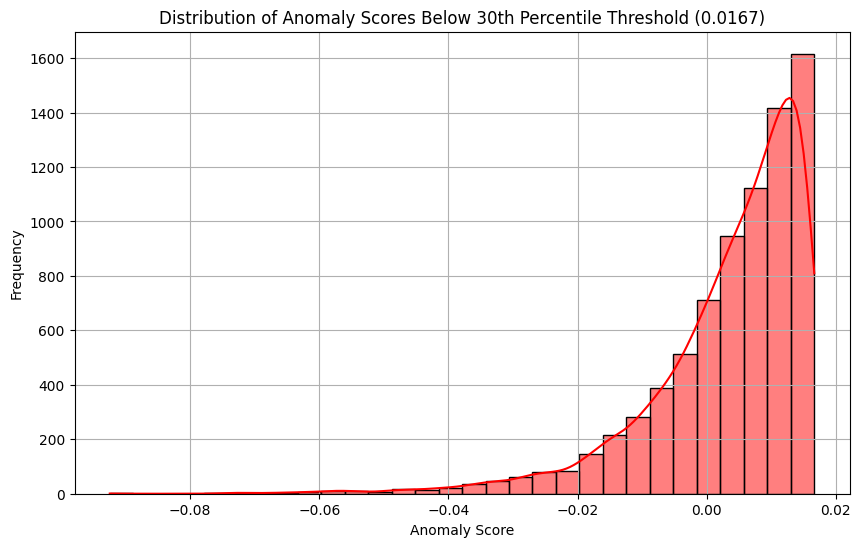


Number of anomaly scores below the 30th percentile threshold: 7767
Descriptive Statistics of Anomaly Scores Below Threshold:
count    7767.000000
mean        0.003389
std         0.012344
min        -0.092443
25%        -0.001581
50%         0.006707
75%         0.012207
max         0.016663
dtype: float64


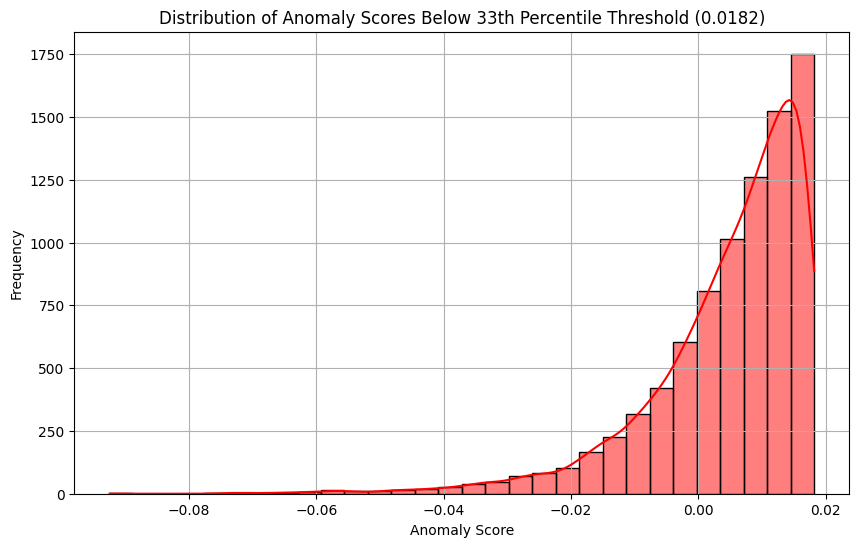


Number of anomaly scores below the 33th percentile threshold: 8544
Descriptive Statistics of Anomaly Scores Below Threshold:
count    8544.000000
mean        0.004667
std         0.012444
min        -0.092443
25%        -0.000468
50%         0.008034
75%         0.013647
max         0.018199
dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for p, threshold_val in anomaly_thresholds.items():
    # Filter anomaly scores below the current threshold
    tail_anomalies_for_p = anomaly_scores_series[anomaly_scores_series < threshold_val]

    plt.figure(figsize=(10, 6))
    sns.histplot(tail_anomalies_for_p, kde=True, color='red', bins=30)
    plt.title(f'Distribution of Anomaly Scores Below {p}th Percentile Threshold ({threshold_val:.4f})')
    plt.xlabel('Anomaly Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    print(f"\nNumber of anomaly scores below the {p}th percentile threshold: {len(tail_anomalies_for_p)}")
    print("Descriptive Statistics of Anomaly Scores Below Threshold:")
    print(tail_anomalies_for_p.describe())


## Final Task



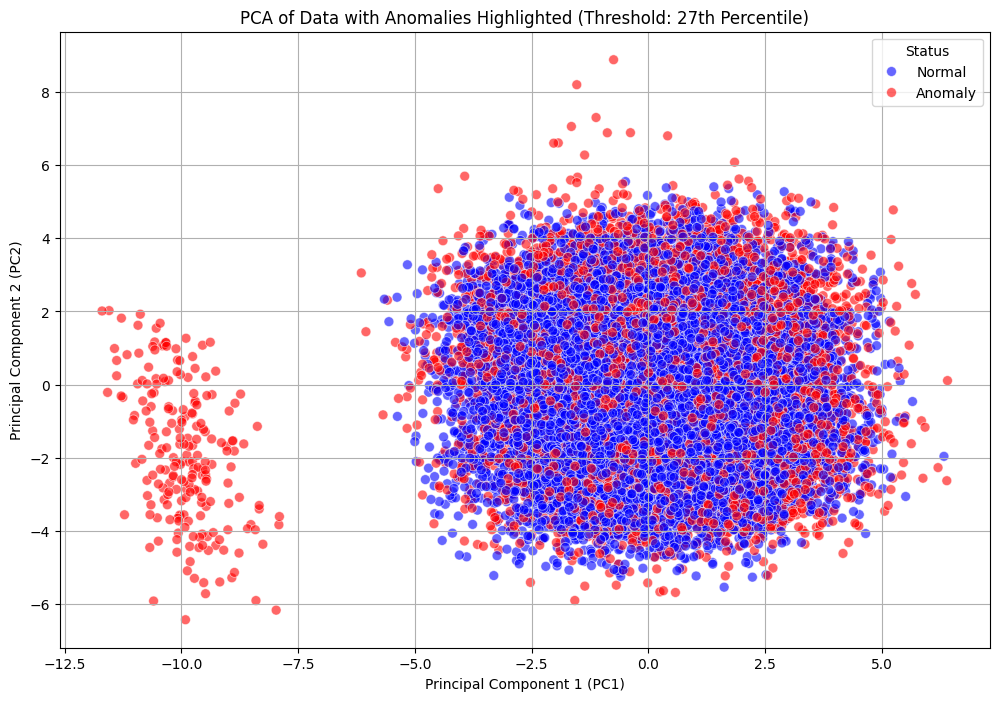

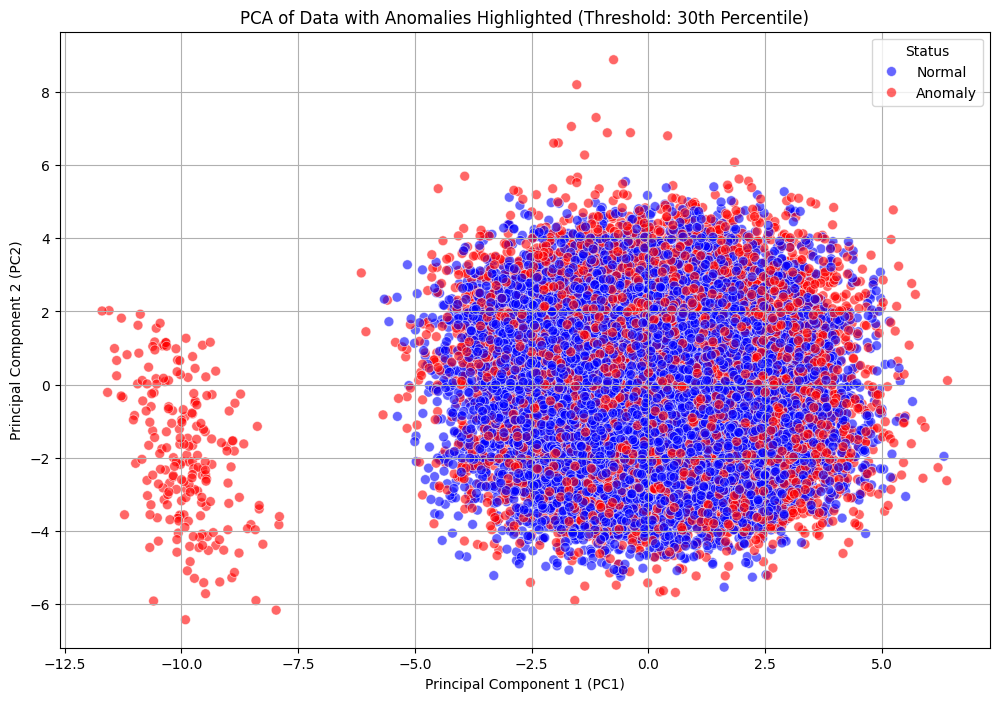

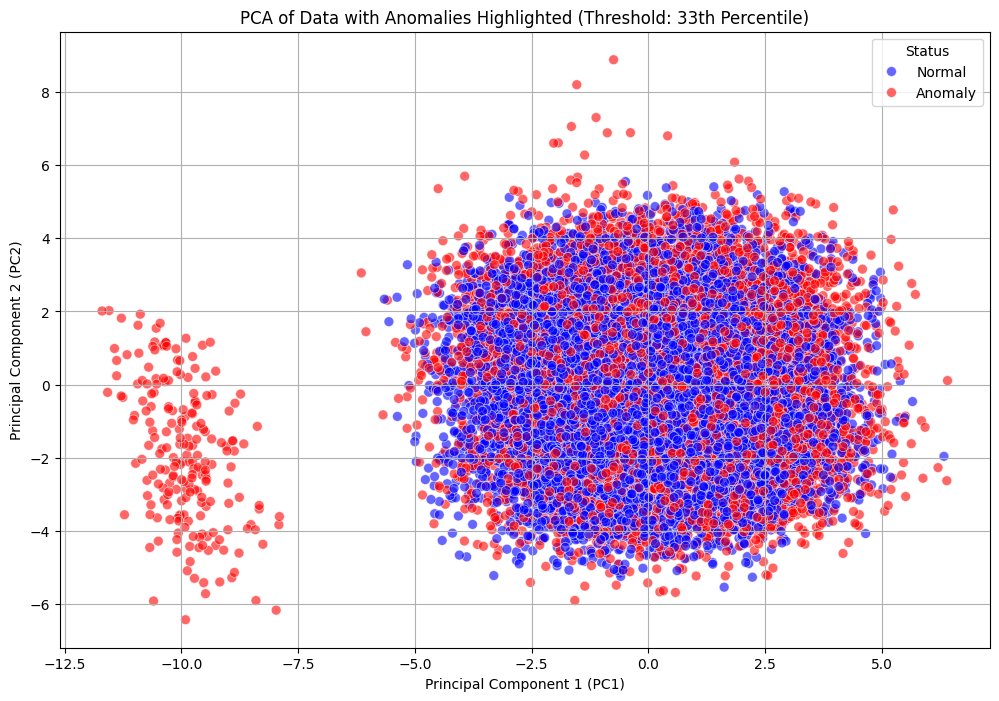

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy of X_pca_df to avoid modifying the original dataframe repeatedly in the loop
X_pca_df_temp = X_pca_df[['PC1', 'PC2']].copy()

for p, threshold_val in anomaly_thresholds.items():
    # Create 'is_anomaly' column based on the current threshold
    X_pca_df_temp['is_anomaly'] = anomaly_scores_series < threshold_val

    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=X_pca_df_temp,
        x='PC1',
        y='PC2',
        hue='is_anomaly',
        palette={True: 'red', False: 'blue'},
        markers={True: 'X', False: 'o'},
        s=50, # size of markers
        alpha=0.6 # transparency
    )

    # Add title and labels
    plt.title(f'PCA of Data with Anomalies Highlighted (Threshold: {p}th Percentile)')
    plt.xlabel('Principal Component 1 (PC1)')
    plt.ylabel('Principal Component 2 (PC2)')

    # Customize legend
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles=handles[0:], labels=['Normal', 'Anomaly'], title='Status')

    plt.grid(True)
    plt.show()


## Export Anomalous Data to CSV 

In [ ]:
# Ensure anomaly_scores_series has the same index as df_test if they don't already
# This is important if df_test underwent any row-dropping operations, but in our case it didn't.
# So we can just assign it directly.
df_with_scores = df_test.copy()
df_with_scores['anomaly_score'] = anomaly_scores_series.values

for p, threshold_val in anomaly_thresholds.items():
    # Identify anomalous rows for the current threshold
    anomalous_data = df_with_scores[df_with_scores['anomaly_score'] < threshold_val]

    # Define filename for the CSV
    filename = f'anomalies_below_{p}th_percentile.csv'

    # Save to CSV
    anomalous_data.to_csv(filename, index=False)

    print(f"Anomalous data below {p}th percentile (threshold: {threshold_val:.4f}) saved to {filename}")
    print(f"Number of anomalies saved: {len(anomalous_data)}\n")


Anomalous data below 27th percentile (threshold: 0.0149) saved to anomalies_below_27th_percentile.csv
Number of anomalies saved: 6990

Anomalous data below 30th percentile (threshold: 0.0167) saved to anomalies_below_30th_percentile.csv
Number of anomalies saved: 7767

Anomalous data below 33th percentile (threshold: 0.0182) saved to anomalies_below_33th_percentile.csv
Number of anomalies saved: 8544



## Generate Submission Files for Each Anomaly Threshold


In [ ]:
# Ensure df_with_scores contains the original 'id' and 'anomaly_score'
# (This was created in the previous step, so we can reuse it)

for p, threshold_val in anomaly_thresholds.items():
    # Identify anomalous rows for the current threshold
    anomalous_data_for_submission = df_with_scores[df_with_scores['anomaly_score'] < threshold_val]

    # Select only 'id' and 'anomaly_score' for the submission file
    submission_df = anomalous_data_for_submission[['id', 'anomaly_score']]

    # Define filename for the submission CSV
    submission_filename = f'submission_anomalies_below_{p}th_percentile.csv'

    # Save to CSV
    submission_df.to_csv(submission_filename, index=False)

    print(f"Submission file for anomalies below {p}th percentile (threshold: {threshold_val:.4f}) saved to {submission_filename}")
    print(f"Number of entries in submission file: {len(submission_df)}\n")


Submission file for anomalies below 27th percentile (threshold: 0.0149) saved to submission_anomalies_below_27th_percentile.csv
Number of entries in submission file: 6990

Submission file for anomalies below 30th percentile (threshold: 0.0167) saved to submission_anomalies_below_30th_percentile.csv
Number of entries in submission file: 7767

Submission file for anomalies below 33th percentile (threshold: 0.0182) saved to submission_anomalies_below_33th_percentile.csv
Number of entries in submission file: 8544

